In [7]:
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential, load_model
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import normalize

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

from time import sleep

In [8]:
JOGANDO_DIR = 'Jogando/'
PARADO_DIR = 'Parado/'

SIZE = 150
INPUT_SHAPE = (SIZE, SIZE, 3)
dataset = []
label = []

In [9]:
# jogando imagens
jogando_imagens = os.listdir(JOGANDO_DIR)
jogando_imagens = jogando_imagens[0:100]
for imagem_nome in jogando_imagens: 
    caminho_imagem = os.path.join(JOGANDO_DIR, imagem_nome)
    
    # processamento das imagens
    image = cv2.imread(caminho_imagem)
    image = Image.fromarray(image)
    image = image.resize((SIZE, SIZE))
    
    # dataset, label append
    dataset.append(np.array(image))
    label.append(1)

In [10]:
# parado imagens
parado_imagens = os.listdir(PARADO_DIR)
parado_imagens = parado_imagens[0:100]

for imagem_nome in parado_imagens:
    caminho_imagem = os.path.join(PARADO_DIR, imagem_nome)
    
    # processamento das imagens
    image = cv2.imread(caminho_imagem)
    image = Image.fromarray(image)
    image = image.resize((SIZE, SIZE))
    
    # dataset, label append
    dataset.append(np.array(image))
    label.append(0)

In [11]:
# lista para array
dataset = np.array(dataset)
label = np.array(label)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.20, random_state=0)

x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu')) 
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [15]:
history = model.fit(x_train,
                y_train,
                batch_size=65,
                verbose=1,
                epochs=5,
                validation_data=(x_test, y_test),
                shuffle=False)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.6706 - accuracy: 0.5000 - val_loss: 0.7314 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 68ms/step - loss: 0.5558 - accuracy: 0.6667 - val_loss: 0.7254 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 62ms/step - loss: 0.7172 - accuracy: 0.5000 - val_loss: 0.7168 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 56ms/step - loss: 0.3666 - accuracy: 1.0000 - val_loss: 0.8102 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 59ms/step - loss: 0.2740 - accuracy: 1.0000 - val_loss: 0.9661 - val_accuracy: 0.5000


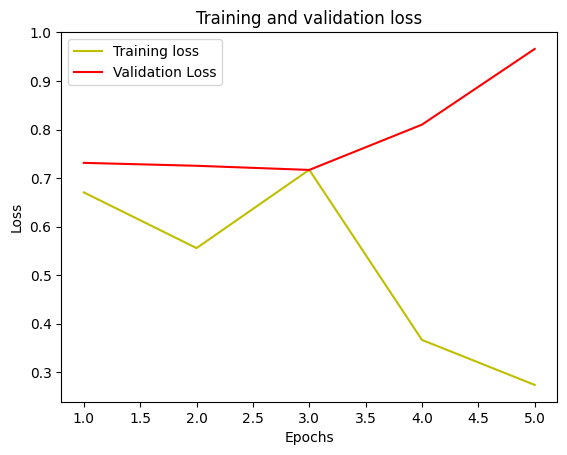

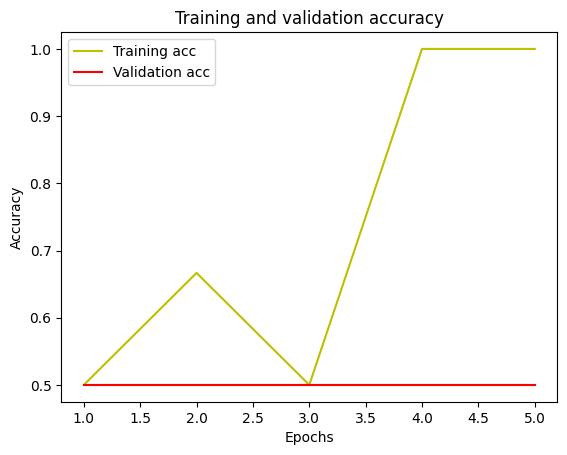

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 66ms/step
Jogando


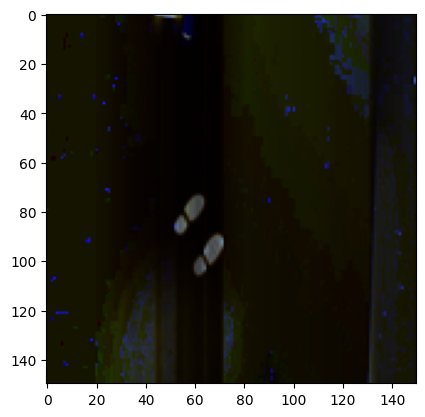

In [17]:
n = np.random.randint(0, len(x_test))
image = x_test[n]
image = img_to_array(image)

input_image = np.expand_dims(image, axis=0)
    
plt.imshow(image)
predict = model.predict(input_image)

if predict >= 0.5:
    print('Jogando')
else:
    print('Parado')
                  